In [82]:
pip install include

Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install --force-reinstall soundfile

  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl.metadata (14 kB)
  Using cached cffi-1.16.0-cp311-cp311-win_amd64.whl.metadata (1.5 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)
Using cached cffi-1.16.0-cp311-cp311-win_amd64.whl (181 kB)
Using cached pycparser-2.22-py3-none-any.whl (117 kB)
  Attempting uninstall: pycparser
    Found existing installation: pycparser 2.22
    Uninstalling pycparser-2.22:
      Successfully uninstalled pycparser-2.22
  Attempting uninstall: cffi
    Found existing installation: cffi 1.16.0
    Uninstalling cffi-1.16.0:
      Successfully uninstalled cffi-1.16.0
  Attempting uninstall: soundfile
    Found existing installation: soundfile 0.12.1
    Uninstalling soundfile-0.12.1:
      Successfully uninstalled soundfile-0.12.1


  You can safely remove it manually.
  You can safely remove it manually.


In [128]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import librosa
import IPython
import os
import csv

In [53]:
#Checking for missing data, no missing data 
metadata.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 1.6 MB


In [108]:
# Set your path to the original dataset
us8k_path = os.path.abspath(r"C:\Users\mbgla\OneDrive\Desktop\GenAI_data\UrbanSound8K\UrbanSound8K" )

# Global settings
metadata_path = os.path.join(us8k_path, r'C:\Users\mbgla\OneDrive\Desktop\GenAI_data\UrbanSound8K\UrbanSound8K\metadata\UrbanSound8K.csv')
audio_path = os.path.join(us8k_path, 'audio')

In [49]:
metadata = pd.read_csv(r"C:\Users\mbgla\OneDrive\Desktop\GenAI_data\UrbanSound8K\UrbanSound8K\metadata\UrbanSound8K.csv")

In [50]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [51]:
#Value counts of all the different classes 
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [65]:
#Breakdown of salience count, 1 being 
metadata[('salience')].value_counts()

salience
1    5702
2    3030
Name: count, dtype: int64

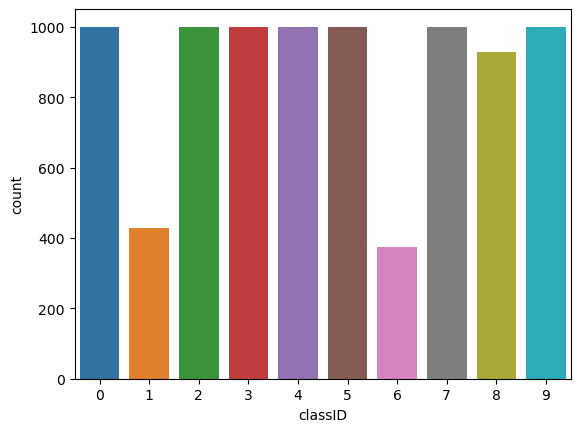

In [52]:
sns.countplot(x=metadata.classID);

<Axes: ylabel='class,salience'>

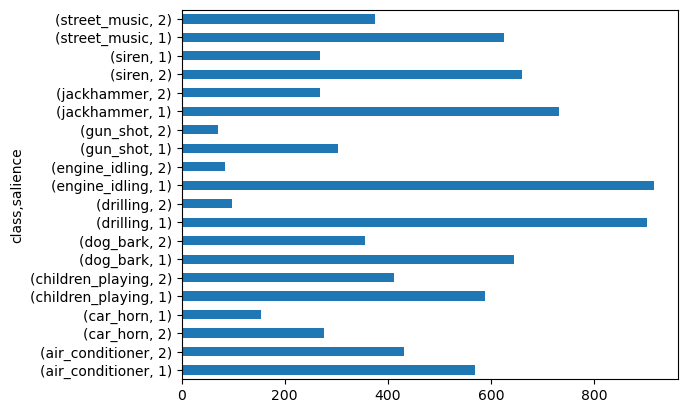

In [105]:
metadata.groupby(by='class')['salience'].value_counts().plot.barh()

In [127]:
# Read every file header to collect audio properties
audiodata = []
for index, row in metadata.iterrows():
    cat = str(row["class"])
    fold = 'fold'+str(row["fold"])
    name = str(row["slice_file_name"])
    file_name = os.path.join(audio_path, fold, name)
    duration = row['end'] - row['start']
    audiodata.append((name, fold, cat, duration))

# Convert into a Pandas dataframe
audiodatadf = pd.DataFrame(audiodata, columns=['file', 'fold', 'class', 'duration'])

In [114]:
audiodatadf

,file,fold,class,duration
0,100032-3-0-0.wav,fold5,dog_bark,0.317551
1,100263-2-0-117.wav,fold5,children_playing,4.000000
2,100263-2-0-121.wav,fold5,children_playing,4.000000
3,100263-2-0-126.wav,fold5,children_playing,4.000000
4,100263-2-0-137.wav,fold5,children_playing,4.000000
...,...,...,...,...
8727,99812-1-2-0.wav,fold7,car_horn,4.000000
8728,99812-1-3-0.wav,fold7,car_horn,2.142545
8729,99812-1-4-0.wav,fold7,car_horn,3.505983
8730,99812-1-5-0.wav,fold7,car_horn,2.532098


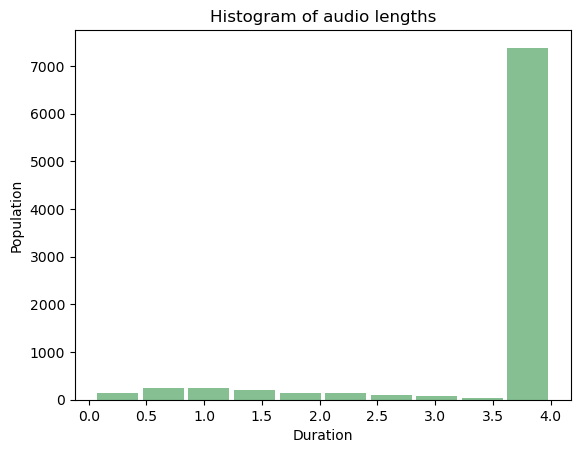

Greater than 3 seconds: 7468
Lower than 3 seconds: 1264
Lower than 1.5 seconds: 785


In [113]:
plt.hist(audiodatadf['duration'], rwidth=0.9, color='#86bf91')

plt.xlabel('Duration')
plt.ylabel('Population')
plt.title('Histogram of audio lengths')
plt.grid(False)
plt.show()

# Count samples with duration > 3 sec
gt_3sec = audiodatadf['duration'][audiodatadf['duration'] > 3].count()
lt_3sec = audiodatadf['duration'][audiodatadf['duration'] < 3].count()
lt_15sec = audiodatadf['duration'][audiodatadf['duration'] < 1.5].count()

# Display counts of interest
print("Greater than 3 seconds: {}".format(gt_3sec))
print("Lower than 3 seconds: {}".format(lt_3sec))
print("Lower than 1.5 seconds: {}".format(lt_15sec))

In [56]:
# Load the audio files and labels
audio_files = []
labels = []

# Load the labels from the csv file
label_dict = {}
with open("/Users/mbgla/OneDrive/Desktop/GenAI_data/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv") as f:
    reader = csv.reader(f)
    next(reader)  # skip header row
    for row in reader:
        filename = row[0]
        label = row[7]  # label is in the 8th column (index 7)
        label_dict[filename] = label



In [57]:
# Loop through all the folders in the directory
for foldername in os.listdir("/Users/mbgla/OneDrive/Desktop/GenAI_data/UrbanSound8K/UrbanSound8K/"):
    if foldername.endswith(".csv"):  # skip csv files
        continue
    if foldername.endswith(".DS_Store"):
        continue
    # Loop through all the audio files in the folder
    for filename in os.listdir("/Users/mbgla/OneDrive/Desktop/GenAI_data/UrbanSound8K/UrbanSound8K/{}".format(foldername)):
        # Load the audio file
        data, sr = librosa.load("/Users/mbgla/OneDrive/Desktop/GenAI_data/UrbanSound8K/UrbanSound8K/{}/{}".format(foldername, filename), sr=None)
        
        # Get the label for the audio file
        label = label_dict[filename]
        
        audio_files.append((data, sr))
        labels.append(label)

C:\Users\mbgla\AppData\Local\Temp\ipykernel_15140\2150692422.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  data, sr = librosa.load("/Users/mbgla/OneDrive/Desktop/GenAI_data/UrbanSound8K/UrbanSound8K/{}/{}".format(foldername, filename), sr=None)


NoBackendError: 

In [8]:
(r"C:\Users\mbgla\OneDrive\Desktop\GenAI_data\UrbanSound8K\UrbanSound8K\Orginial")

'C:\\Users\\mbgla\\OneDrive\\Desktop\\GenAI_data\\UrbanSound8K\\UrbanSound8K\\Orginial'

In [42]:
labels = []
# Load the labels from the csv file
label_dict = {}
with open("/Users/mbgla/OneDrive/Desktop/GenAI_data/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv") as f:
    reader = csv.reader(f)
    next(reader)  # skip header row
    for row in reader:
        filename = row[0]
        label = row[7]  # label is in the 8th column (index 7)
        label_dict[filename] = label

In [38]:
# Get the label for the audio file
label = label_dict[filename]

In [41]:
label

'car_horn'

In [43]:
# Loop through all the categories
for category in set(labels):
    # Find an audio file in the category
    index = labels.index(category)
    data, sr = audio_files[index]
    
    # Plot the waveform and spectrogram in the same figure
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax1.plot(data)
    ax1.set_title("Waveform for category: {}".format(category))
    S = librosa.core.stft(data, n_fft=1024, hop_length=512)
    spectrogram = np.abs(S)
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='linear', ax=ax2)
    ax2.set_title("Spectrogram for category: {}".format(category))
    fig.tight_layout()
    plt.show()

In [40]:
# Loop through all the categories
for category in set(labels):
    # Find an audio file in the category
    index = labels.index(category)
    data, sr = audio_files[index]
    
    # Plot the waveform and spectrogram in the same figure
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax1.plot(data)
    ax1.set_title("Waveform for category: {}".format(category))
    S = librosa.core.stft(data, n_fft=1024, hop_length=512)
    spectrogram = np.abs(S)
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='linear', ax=ax2)
    ax2.set_title("Spectrogram for category: {}".format(category))
    fig.tight_layout()
    plt.show()

In [30]:
os.chdir(r"C:\Users\mbgla\OneDrive\Desktop\GenAI_data\UrbanSound8K\UrbanSound8K\Orginial")
for root, dirs, files in os.walk("."):  
    for file in files:
        if ".wav" in file:
            folder = os.path.basename(root)
            relative_path = os.path.join(folder, file)
            print(relative_path)
            sample_file, sampling_rate = librosa.load(relative_path)

fold1\101415-3-0-2.wav


C:\Users\mbgla\AppData\Local\Temp\ipykernel_15140\1852021325.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  sample_file, sampling_rate = librosa.load(relative_path)


FileNotFoundError: [Errno 2] No such file or directory: 'fold1\\101415-3-0-2.wav'

In [15]:
import IPython
from IPython.display import Audio
# Loop through all the classes
for category in set(labels):
    # Find an audio file in the category
    index = labels.index(category)
    data, sr = audio_files[index]
    
    # Play the audio file
    print("Playing example audio file for category: {}".format(category))
    IPython.display.Audio(data=data, rate=sr)

NameError: name 'labels' is not defined

In [14]:
# Loop through all the categories
for category in set(labels):
    # Find an audio file in the category
    index = labels.index(category)
    data, sr = audio_files[index]
    
    # Plot the waveform and spectrogram in the same figure
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax1.plot(data)
    ax1.set_title("Waveform for category: {}".format(category))
    S = librosa.core.stft(data, n_fft=1024, hop_length=512)
    spectrogram = np.abs(S)
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='linear', ax=ax2)
    ax2.set_title("Spectrogram for category: {}".format(category))
    fig.tight_layout()
    plt.show()

NameError: name 'labels' is not defined

In [8]:
dat1, sampling_rate1 = librosa.load(r"C:\Users\mbgla\OneDrive\Desktop\GenAI_data\UrbanSound8K\UrbanSound8K\audio\fold1\7061-6-0-0.wav")

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

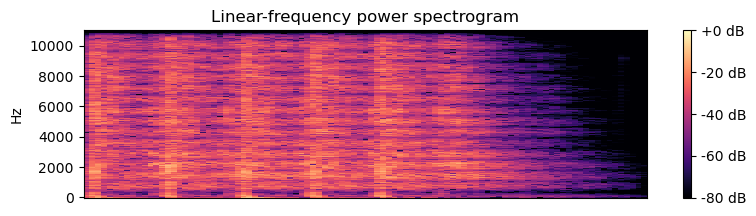

In [9]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [10]:
arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cla = np.array(df["class"])
data = (r'C:\Users\mbgla\OneDrive\Desktop\GenAI_data\UrbanSound8K\UrbanSound8K\audio\fold3')
        
data

NameError: name 'df' is not defined

In [ ]:
IPython.display.Audio(r"C:\Users\mbgla\OneDrive\Desktop\GenAI_data\UrbanSound8K\UrbanSound8K\audio\fold1\7061-6-0-0.wav")

In [ ]:
dat1, sampling_rate1 = librosa.load(r"C:\Users\mbgla\OneDrive\Desktop\GenAI_data\UrbanSound8K\UrbanSound8K\audio\fold1\7061-6-0-0.wav")

In [ ]:
fold

In [ ]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [ ]:
IPython.display.Audio(r"C:\Users\mbgla\OneDrive\Desktop\GenAI_data\UrbanSound8K\UrbanSound8K\audio\fold2\4201-3-0-0.wav")

In [ ]:
df_fold1 = df.loc[(df['fold'] == 1)]
df_fold2 = df.loc[(df['fold'] == 2)]
df_fold3 = df.loc[(df['fold'] == 3)]
df_fold4 = df.loc[(df['fold'] == 4)]
df_fold5 = df.loc[(df['fold'] == 5)]
df_fold6 = df.loc[(df['fold'] == 6)]
df_fold7 = df.loc[(df['fold'] == 7)]
df_fold8 = df.loc[(df['fold'] == 8)]
df_fold9 = df.loc[(df['fold'] == 9)]
df_fold10 = df.loc[(df['fold'] == 10)]

In [ ]:
df_fold1

NameError: name 'df_fold1' is not defined

In [132]:
input_length = 16000*4
def load_audio_file(file_path, input_length=input_length):
    
    data, sr = librosa.core.load(file_path, sr=16000) 
    if len(data)>input_length:
        
        max_offset = len(data)-input_length
        offset = np.random.randint(max_offset)
        data = data[offset:(input_length+offset)]
              
    else:
        
        if input_length > len(data):
            max_offset = input_length - len(data)
            offset = np.random.randint(max_offset)
            
        else:
            offset = 0
        
        data = np.pad(data, (offset, input_length - len(data) - offset), "constant")
        data = audio_normalization(data)
        
    return data

In [142]:
df = metadata.drop_duplicates(subset = 'class')
df = df.reset_index(drop=True)
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn
3,100852-0-0-0.wav,100852,0.000000,4.000000,1,5,0,air_conditioner
4,101848-9-0-0.wav,101848,0.000000,4.000000,1,7,9,street_music
5,102305-6-0-0.wav,102305,0.000000,2.611610,1,1,6,gun_shot
6,102853-8-0-0.wav,102853,0.000000,4.000000,2,7,8,siren
7,102857-5-0-0.wav,102857,0.000000,4.000000,1,10,5,engine_idling
8,103074-7-0-0.wav,103074,3.341279,7.341279,1,1,7,jackhammer
9,103199-4-0-0.wav,103199,0.000000,4.000000,1,3,4,drilling


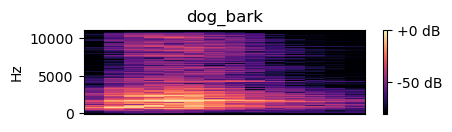

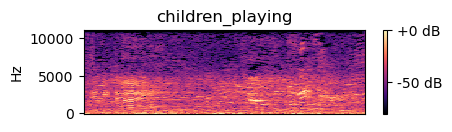

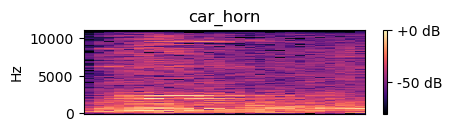

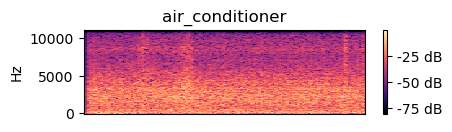

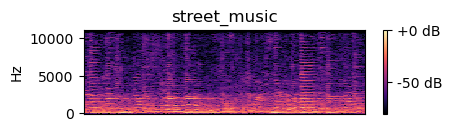

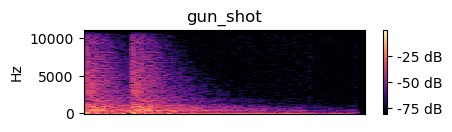

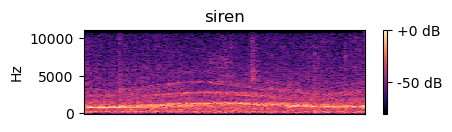

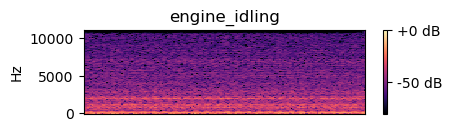

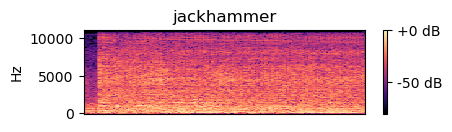

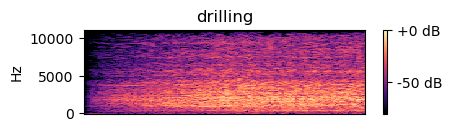

In [156]:
arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cla = np.array(df["class"])

for i in range(0,10):
    path = (r"C:\Users\mbgla\OneDrive\Desktop\GenAI_data\UrbanSound8K\UrbanSound8K\Orginial\audio\fold" + str(fold[i]) + '\\' + arr[i])
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

In [190]:
sounds = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark','drilling','engine_ideling','gun_shot','jackhammer','siren','street_music']
sounds[0]

'air_conditioner'

In [244]:
def sound_df(name, classID):
    name = metadata.loc[(metadata['classID'] == classID)]
    name = name.head(5)

In [324]:
num_show = 1

In [325]:
#Air_conditioner
air_conditioner = metadata.loc[(metadata['classID'] == 0)]
air_conditioner = air_conditioner.head(num_show)
#car_horn 
car_horn = metadata.loc[(metadata['classID'] == 1)]
car_horn = car_horn.head(num_show)
#children_playing
children_playing = metadata.loc[(metadata['classID'] == 2)]
children_playing = children_playing.head(num_show)
#dog_barking
dog_barking = metadata.loc[(metadata['classID'] == 3)]
dog_barking = dog_barking.head(num_show)
#drilling
drilling = metadata.loc[(metadata['classID'] == 4)]
drilling = drilling.head(num_show)
#enging_idling
enging_idling = metadata.loc[(metadata['classID'] == 5)]
enging_idling = enging_ideling.head(num_show)
#gun_shot
gun_shot = metadata.loc[(metadata['classID'] == 6)]
gun_shot = gun_shot.head(num_show)
#jackhammer
jackhammer = metadata.loc[(metadata['classID'] == 7)]
jackhammer = jackhammer.head(num_show)
#siren
siren = metadata.loc[(metadata['classID'] == 8)]
siren = siren.head(num_show)
#street_music
street_music = metadata.loc[(metadata['classID'] == 9)]
street_music = street_music.head(num_show)

In [330]:
"""
def spectogram(sound_df):
    arr = np.array(sound_df["slice_file_name"])
    fold = np.array(sound_df["fold"])
    cla = np.array(sound_df["class"])
    
    for i in range(0,num_show):
        path = (r"C:\Users\mbgla\OneDrive\Desktop\GenAI_data\UrbanSound8K\UrbanSound8K\Orginial\audio\fold" + str(fold[i]) + '\\' + arr[i])
        data, sampling_rate = librosa.load(path)
        plt.figure(figsize=(10, 5))
        D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
        plt.subplot(4, 2, 1)
        librosa.display.specshow(D, y_axis='linear')
        plt.colorbar(format='%+2.0f dB')
        plt.title(cla[i])
"""

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 208-209: truncated \UXXXXXXXX escape (981582184.py, line 16)

In [331]:
def spectogram(sound_df):
    arr = np.array(sound_df["slice_file_name"])
    fold = np.array(sound_df["fold"])
    cla = np.array(sound_df["class"])
    
    for i in range(0,num_show):
        path = (r"C:\Users\mbgla\OneDrive\Desktop\GenAI_data\UrbanSound8K\UrbanSound8K\Orginial\audio\fold" + str(fold[i]) + '\\' + arr[i])
        data, sampling_rate = librosa.load(path)
        figsize=(10,5)
        fig, (ax1, ax2) = plt.subplots(2, figsize=figsize) 
        fig.tight_layout()
        ax1.plot(data)
        ax1.set_title('Waveform')
        ax1.set_xlim([0, len(data)])

        D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
        #plt.subplot(4, 2, 1)
        librosa.display.specshow(D, y_axis='linear')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectogram')

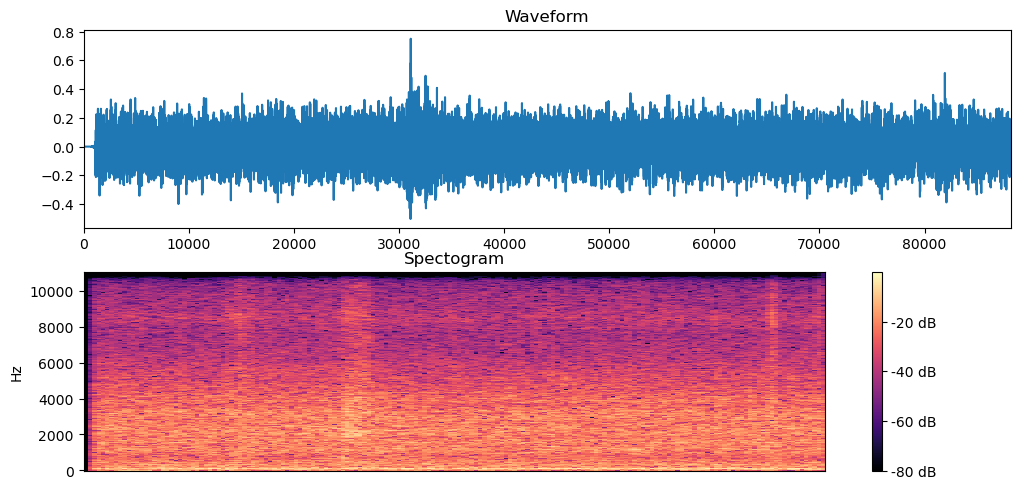

In [332]:
spectogram(air_conditioner)

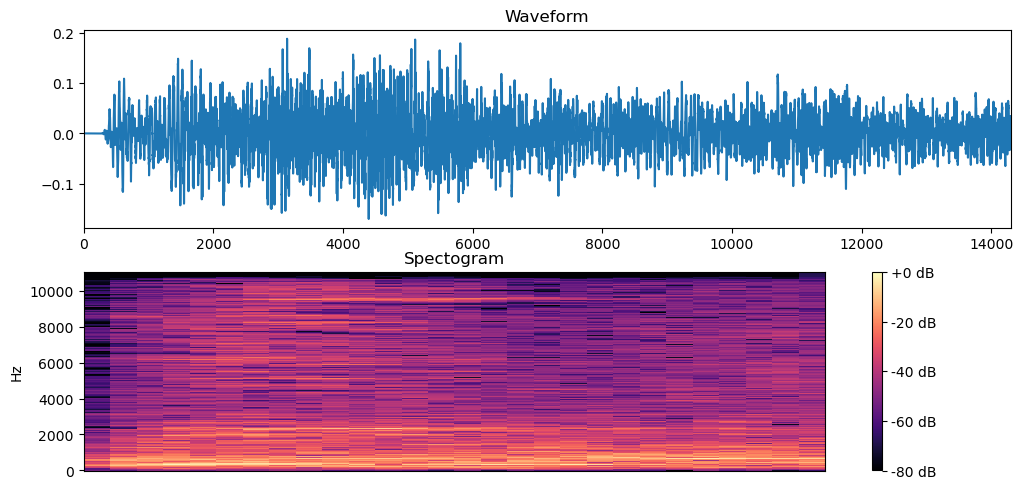

In [333]:
spectogram(car_horn)

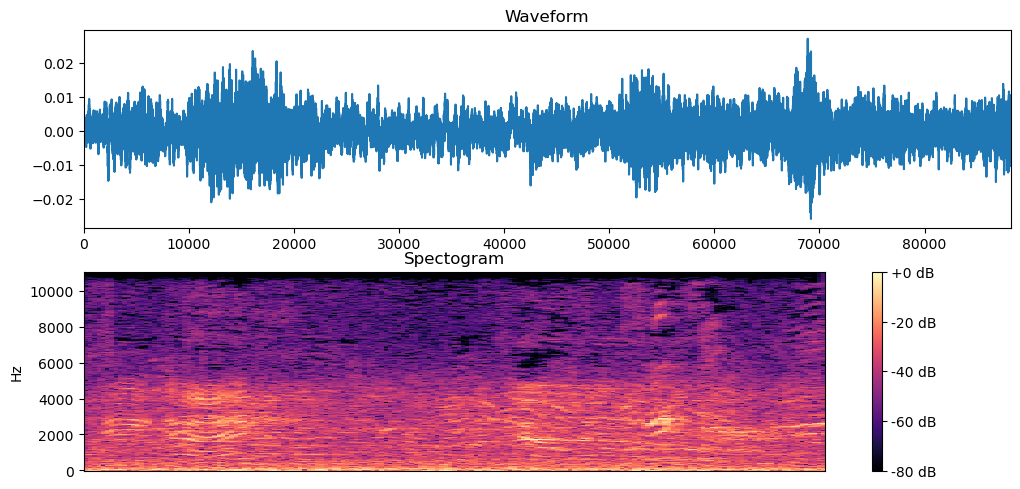

In [334]:
spectogram(children_playing)

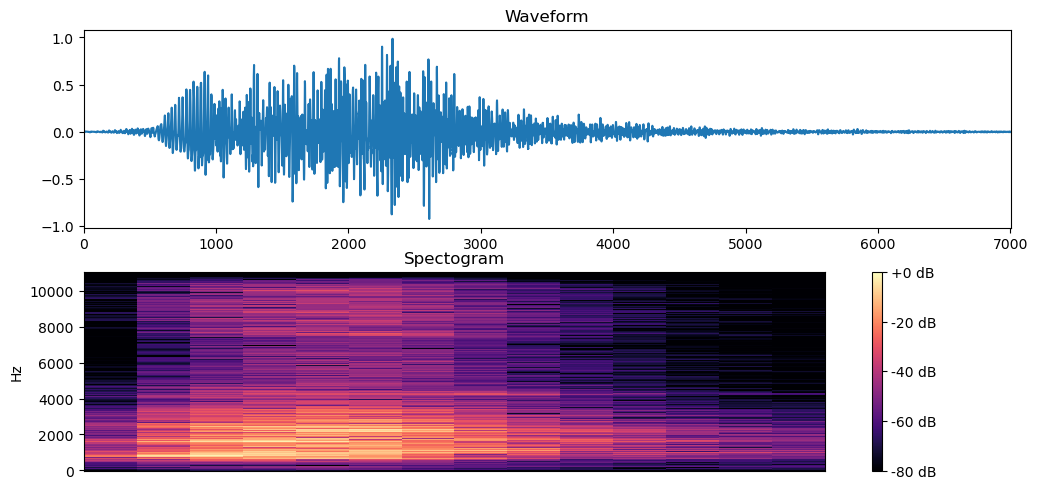

In [335]:
spectogram(dog_barking)

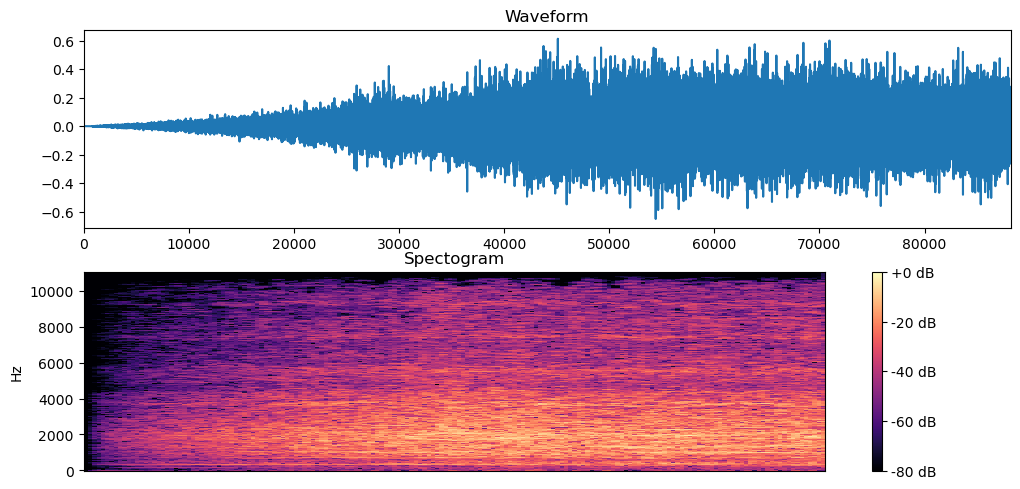

In [336]:
spectogram(drilling)

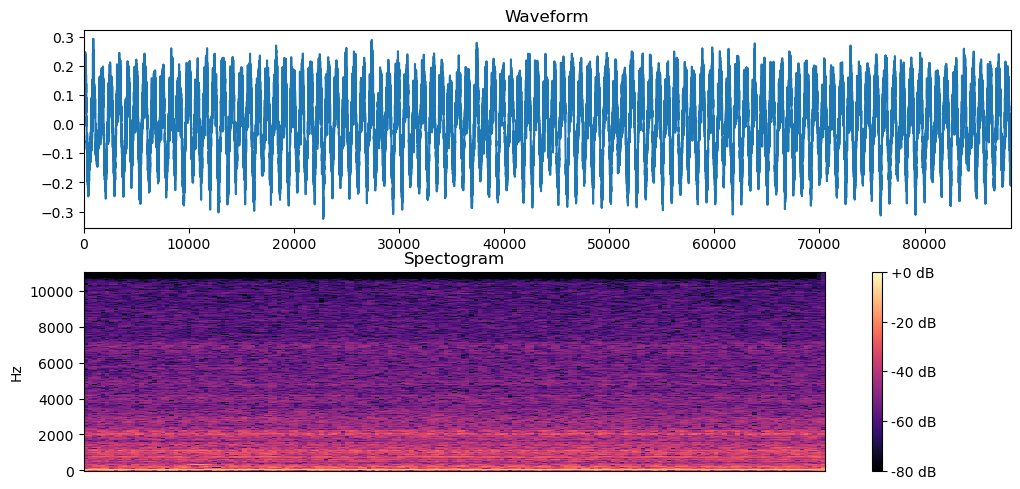

In [337]:
spectogram(enging_idling)

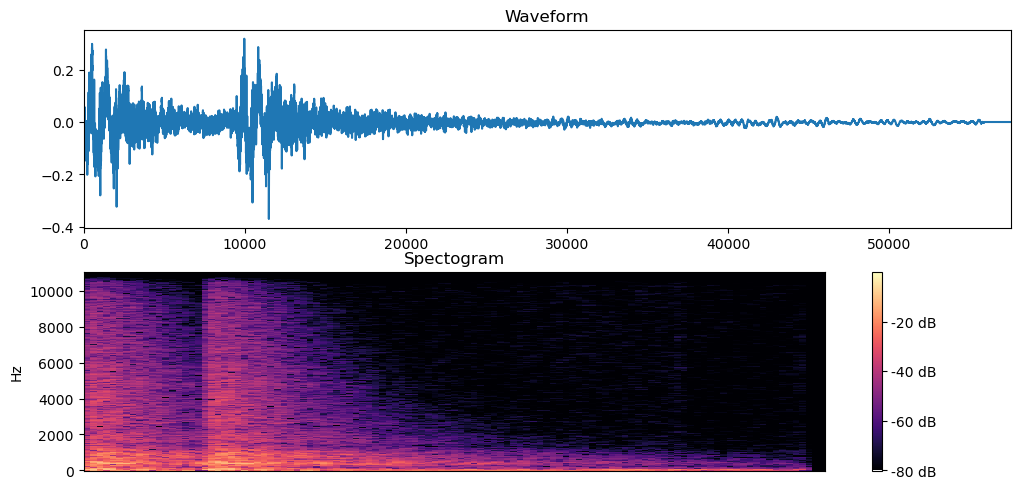

In [338]:
spectogram(gun_shot)

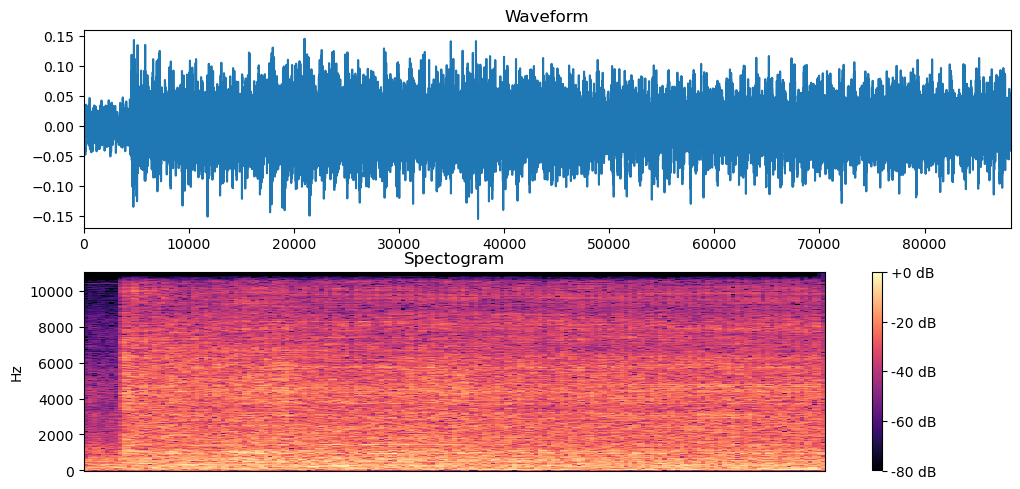

In [339]:
spectogram(jackhammer)

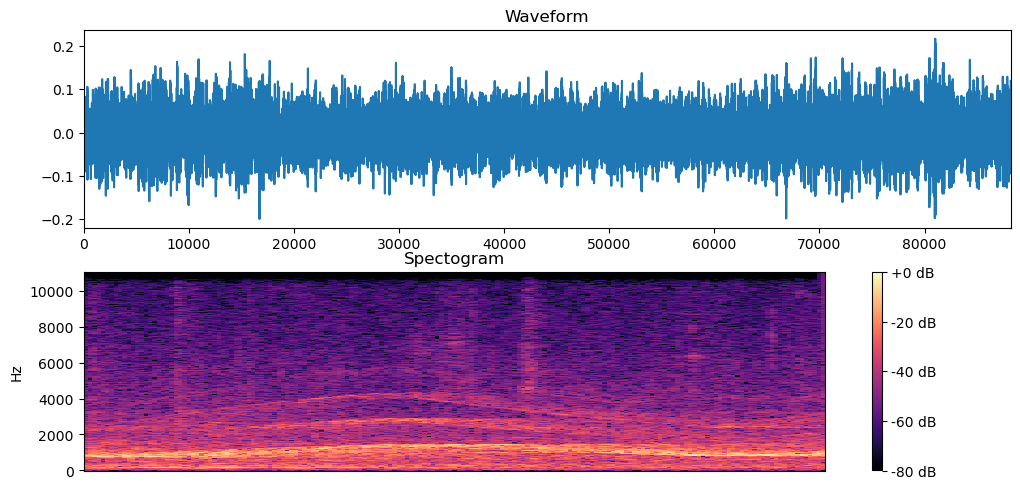

In [340]:
spectogram(siren)

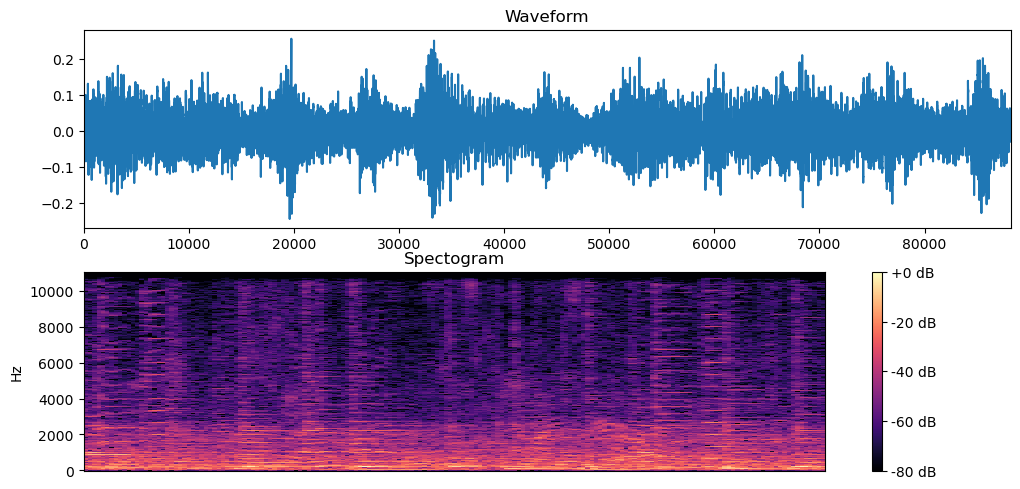

In [341]:
spectogram(street_music)

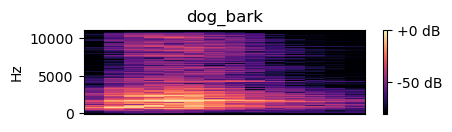

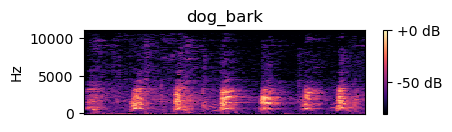

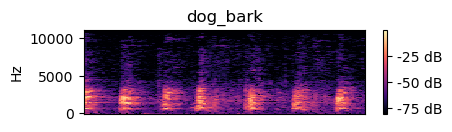

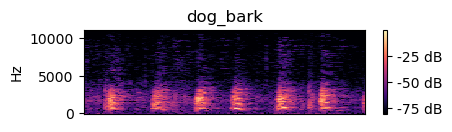

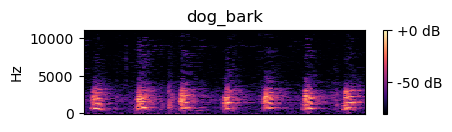

In [170]:
arr = np.array(dog_bark1["slice_file_name"])
fold = np.array(dog_bark1["fold"])
cla = np.array(dog_bark1["class"])

for i in range(0,5):
    path = (r"C:\Users\mbgla\OneDrive\Desktop\GenAI_data\UrbanSound8K\UrbanSound8K\Orginial\audio\fold" + str(fold[i]) + '\\' + arr[i])
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

In [273]:
sample_path = r"C:\Users\mbgla\OneDrive\Desktop\GenAI_data\UrbanSound8K\UrbanSound8K\Orginial\audio\fold5\100032-3-0-0.wav"

waveform, sample_rate = librosa.load(sample_path)


In [275]:
waveform, sample_rate

(array([-0.00347107, -0.00501926, -0.00465448, ..., -0.00248442,
        -0.00154777, -0.00035547], dtype=float32),
 22050)

In [281]:
def plot_audio_data(waveform, figsize=(16, 8)):
    fig, (ax1, ax2) = plt.subplots(2, figsize=figsize)
    
    # Plot waveform
    ax1.plot(waveform)
    ax1.set_title('Waveform')
    ax1.set_xlim([0, len(waveform)])
    
    # Plot spectrogram
    #-----------------
    # Generate spectogram from waveform
    spectrogram = spectogram(waveform) 
    
    # View shapes
    print(f'Waveform shape: {waveform.shape}')
    print(f'Spectrogram shape: {spectrogram.shape}')
    
    # Convert spectrogram shape to 3D if 2D
    if len(spectrogram.shape) > 2:
        assert len(spectrogram.shape) == 3
        spectrogram = np.squeeze(spectrogram, axis=-1)
    
    # Take log of spectrogram (epsillon is added to avoid taking log of 0)
    log_spec = np.log(spectrogram.T + np.finfo(float).eps)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    
    # Plot Spectrogram
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax2.pcolormesh(X, Y, log_spec)
    ax2.set_title('Spectrogram')
    plt.show()

    return

NameError: name 'generate_spectrogram' is not defined

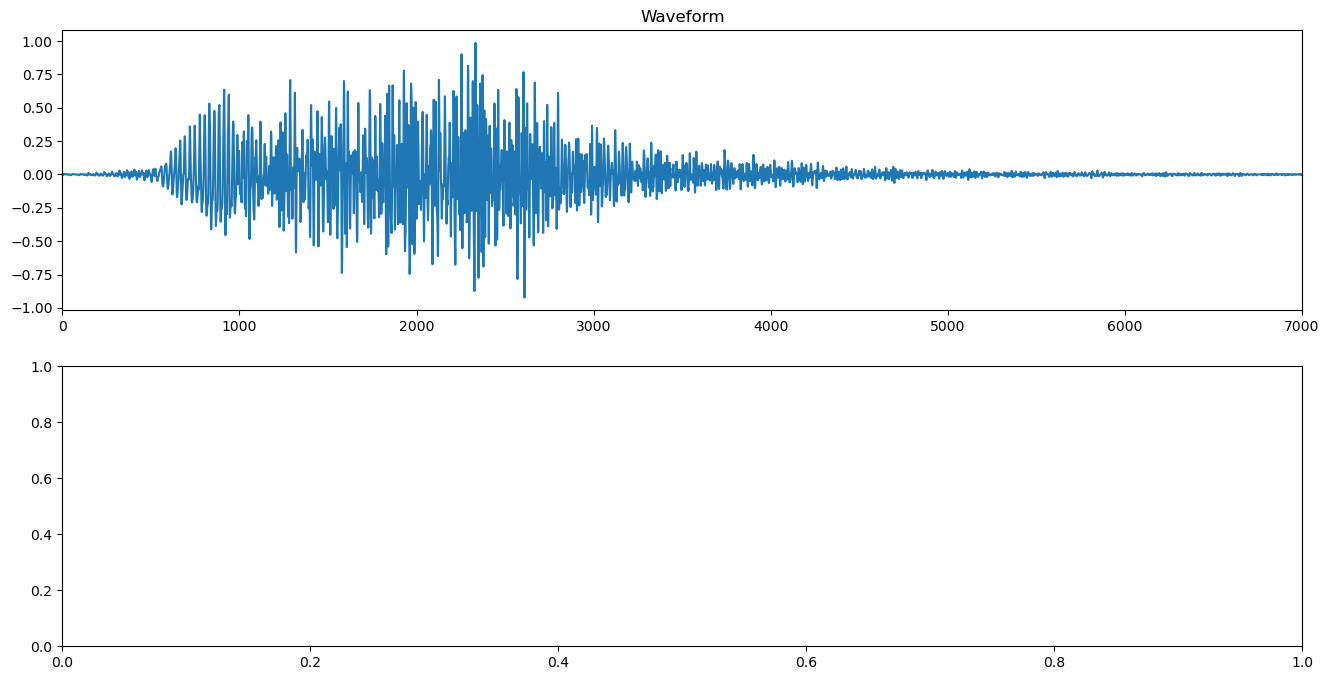

In [284]:
plot_audio_data(waveform)